# 1 LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [7]:
import os
import sys
# 현재 파일의 디렉토리 경로를 직접 지정해줍니다.
current_dir = os.path.dirname(os.path.abspath("../module.py"))
sys.path.append(current_dir)

from module import *

# 데이터를 불러와 학습셋, 테스트셋으로 나눔
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [8]:
category = np.max(y_train) + 1
print('카테고리 :', category)
print('학습용 뉴스 기사 :', len(X_train))
print('테스트용 뉴스 기사 :', len(X_test))
print(X_train[0])

카테고리 : 46
학습용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# 모델의 구조를 설정함
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정함
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 25s 50ms/step - loss: 2.1946 - accuracy: 0.4319 - val_loss: 2.2504 - val_accuracy: 0.3606
Epoch 2/200
450/450 [==============================] - 23s 52ms/step - loss: 1.7968 - accuracy: 0.5383 - val_loss: 1.7425 - val_accuracy: 0.5637
Epoch 3/200
450/450 [==============================] - 26s 58ms/step - loss: 1.6388 - accuracy: 0.5843 - val_loss: 1.6791 - val_accuracy: 0.5779
Epoch 4/200
450/450 [==============================] - 25s 55ms/step - loss: 1.5293 - accuracy: 0.6159 - val_loss: 1.5080 - val_accuracy: 0.6264
Epoch 5/200
450/450 [==============================] - 26s 58ms/step - loss: 1.4566 - accuracy: 0.6319 - val_loss: 1.4767 - val_accuracy: 0.6327
Epoch 6/200
450/450 [==============================] - 27s 59ms/step - loss: 1.3071 - accuracy: 0.6691 - val_loss: 1.3740 - val_accuracy: 0.6581
Epoch 7/200
450/450 [==============================] - 28s 62ms/step - loss: 1.2004 - accuracy: 0.6946 - val_loss: 1.2892 - val_ac

In [13]:
print('Test Accuracy : %.4f'%(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.2564 - accuracy: 0.7235
Test Accuracy : 0.7235


In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

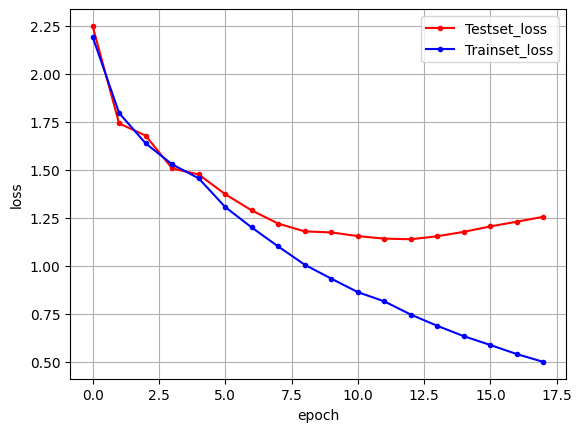

In [15]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()